In [65]:
import numpy as np
from PIL import Image
import time
import saver

In [66]:
image_path = "images/luntik.bmp"
image = Image.open(image_path)
width, height = image.size

`Random SVD method implementation`

In [67]:
def rSVD(X,n,q,p):
    N = (width + height) // 32 // n**2

    ny = X.shape[1]
    P = np.random.randn(ny,N+p)
    Z = X @ P
    for k in range(q):
        Z = X @ ( X.T @ Z)
    
    Q,R = np.linalg.qr(Z,mode='reduced')
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY
    
    return U, S, VT

In [68]:
def new_matrix(name, red, green, blue):
    r_f = np.array(red).flatten()
    g_f = np.array(green).flatten()
    b_f = np.array(blue).flatten()

    new_pixels = list(zip(np.rint(r_f).astype(int),np.rint(g_f).astype(int), np.rint(b_f).astype(int)))
    
    image = Image.new("RGB", (width, height))
    image.putdata(new_pixels)

    image.save(f"images/{name}.bmp")

    return image

In [69]:
red, green, blue = zip(*image.getdata())

In [70]:
red_m = [red[i*width:i*width + width] for i in range(height)]
green_m = [green[i*width:i*width + width] for i in range(height)]
blue_m = [blue[i*width:i*width + width] for i in range(height)]

In [71]:
N = 2

def mult_2(A,B,C):
    return A[:,:(101)] @ np.diag(B[:(101)]) @ C[:(101),:]

r = mult_2(*list(rSVD(np.array(red_m), N,1,5)))
g = mult_2(*list(rSVD(np.array(green_m), N,1,5)))
b = mult_2(*list(rSVD(np.array(blue_m), N,1,5)))

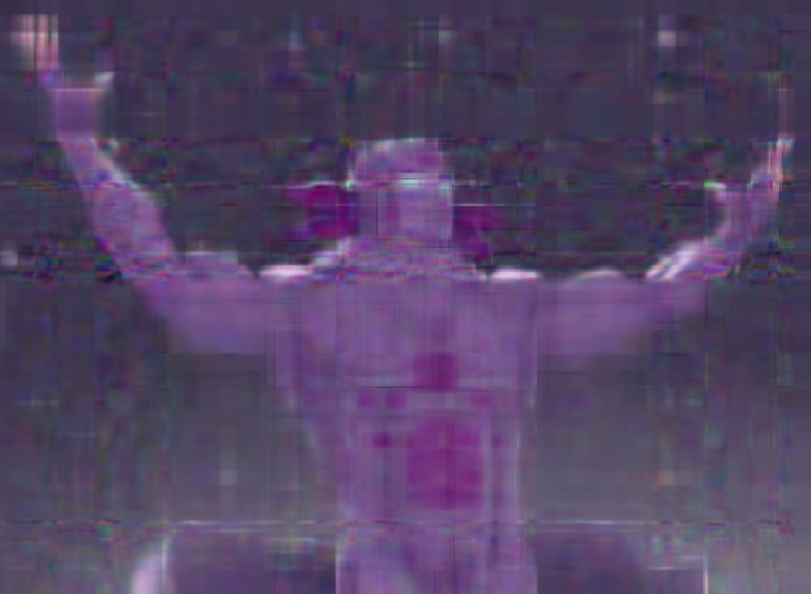

In [72]:
new_matrix("compressed_optimized",np.array(r),np.array(g),np.array(b))

In [73]:
startTime = time.time()

name = "middle_repr_optimized.lol"
saver.create(name,width,height,N)
rn = rSVD(np.array(red_m),N,2,5)
gn = rSVD(np.array(green_m),N,2,5)
bn = rSVD(np.array(blue_m),N,2,5)
saver.write_matrices(name,rn,gn,bn)

endTime = time.time()
elapsedTime = endTime - startTime

print(f'file size:{saver.file_size(name)}')
print(f'time: {elapsedTime}')

file size:494.302734375 Kbs
time: 0.16092729568481445
